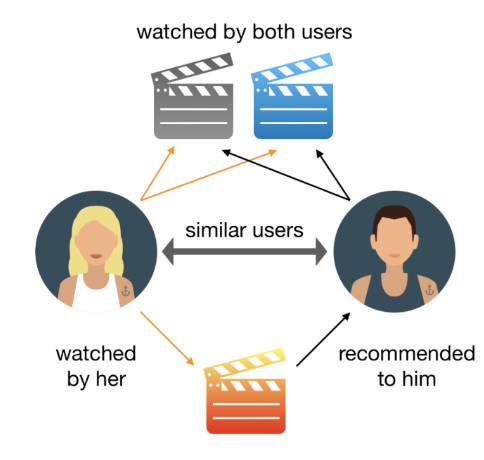


**SVD (Singular Value Decomposition) in a recommendation system works by finding patterns in user preferences and item similarities. Here's a basic idea without going deep into the topic**

**1) What the System Has: A big table (matrix) with users on one side and items (like movies) on the other. Users give ratings to items, but not everyone has rated everything**

**2) What SVD Does: SVD looks at the ratings that are available and tries to figure out the hidden connections between users and items. It learns what kind of movies users like based on their previous ratings**

**3) How It Helps: Once SVD understands these patterns, it can predict how a user might rate a movie they haven’t seen yet. Based on these predictions, the system recommends movies that the user is most likely to enjoy**

**4) Step-by-Step Implementation of SVD in a Recommendation System**

Install and Import Libraries

Load and Prepare the Dataset

Train the SVD Model

Evaluate the Model

Make Predictions

install and import libraries

Load and Prepare the Datasets

Train the SVD MOdel

Make Predictions

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
# Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

In [53]:
# Drive mount
# from google.colab import drive
# drive.mount('/content/drive')

In [54]:
# Read the first data ( Text file)
# netflix_dataset=pd.read_csv("/content/drive/MyDrive/Dataset/combined_data_1.txt",header=None , names=["Cust_Id" , "Rating"] , usecols=[0,1])
# netflix_dataset

In [55]:
netflix_dataset = pd.read_csv('/content/drive/MyDrive/netflix/Data for Files/combinedNetflixData.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

netflix_dataset

Cust_Id  Rating
0              1:     NaN
1         1488844     3.0
2          822109     5.0
3          885013     4.0
4           30878     4.0
...           ...     ...
24058258  2591364     2.0
24058259  1791000     2.0
24058260   512536     5.0
24058261   988963     3.0
24058262  1704416     3.0

[24058263 rows x 2 columns]

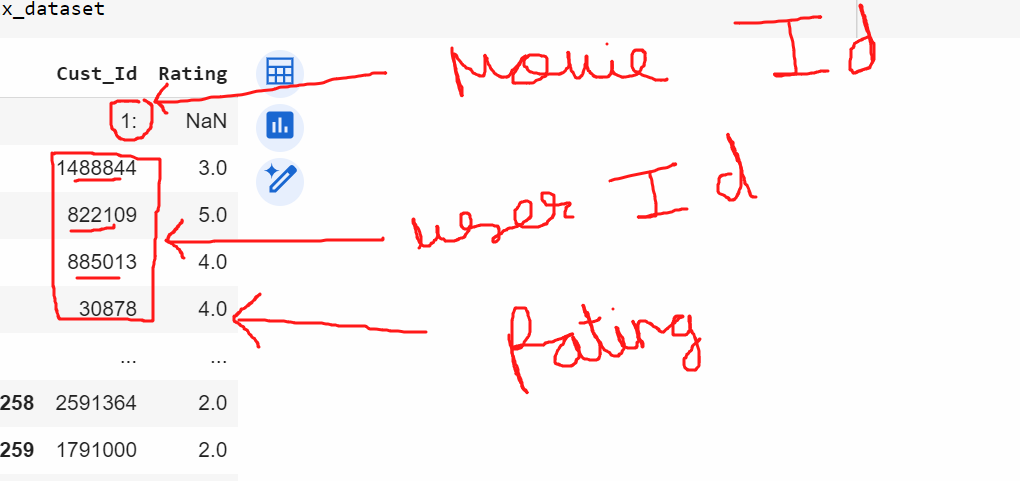

In [56]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [57]:
netflix_dataset.tail()

Cust_Id  Rating
24058258  2591364     2.0
24058259  1791000     2.0
24058260   512536     5.0
24058261   988963     3.0
24058262  1704416     3.0

In [58]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [59]:
netflix_dataset.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [60]:
#total 4499 null values

In [61]:
# Get the count of movies with the help of Cust Id and Rating columns
movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count['Rating']     # To access only RATINGS
movie_count

4499

In [62]:
#to calculate how many customers we are havings in the datasets
total_count =netflix_dataset["Cust_Id"].nunique()  # How many unique value are there in customer id column

In [63]:
total_count

475257

In [64]:
customer_count = total_count - movie_count # Total number of customers that we have after removing movie id(null value) fro the column
customer_count
 # 4 lakh 70 thousand 7 hundred 58

470758

In [65]:
netflix_dataset['Cust_Id'].count()

24058263

In [66]:
#get find out how many people have rated the movie as 1, 2, 3, 4, 5 stars ratings wise to the movie
rating_counts = netflix_dataset['Cust_Id'].count()-movie_count #In customer id columns we will remove movie id to get how many total rating are there
rating_counts

24053764

In [67]:
# To find out how many prople have rated the movie as 1, 2, 3, 4, 5 stars wise to the movies
stars = netflix_dataset.groupby('Rating').agg(['count'])

In [68]:
stars

Cust_Id
          count
Rating         
1.0     1118186
2.0     2439073
3.0     6904181
4.0     8085741
5.0     5506583

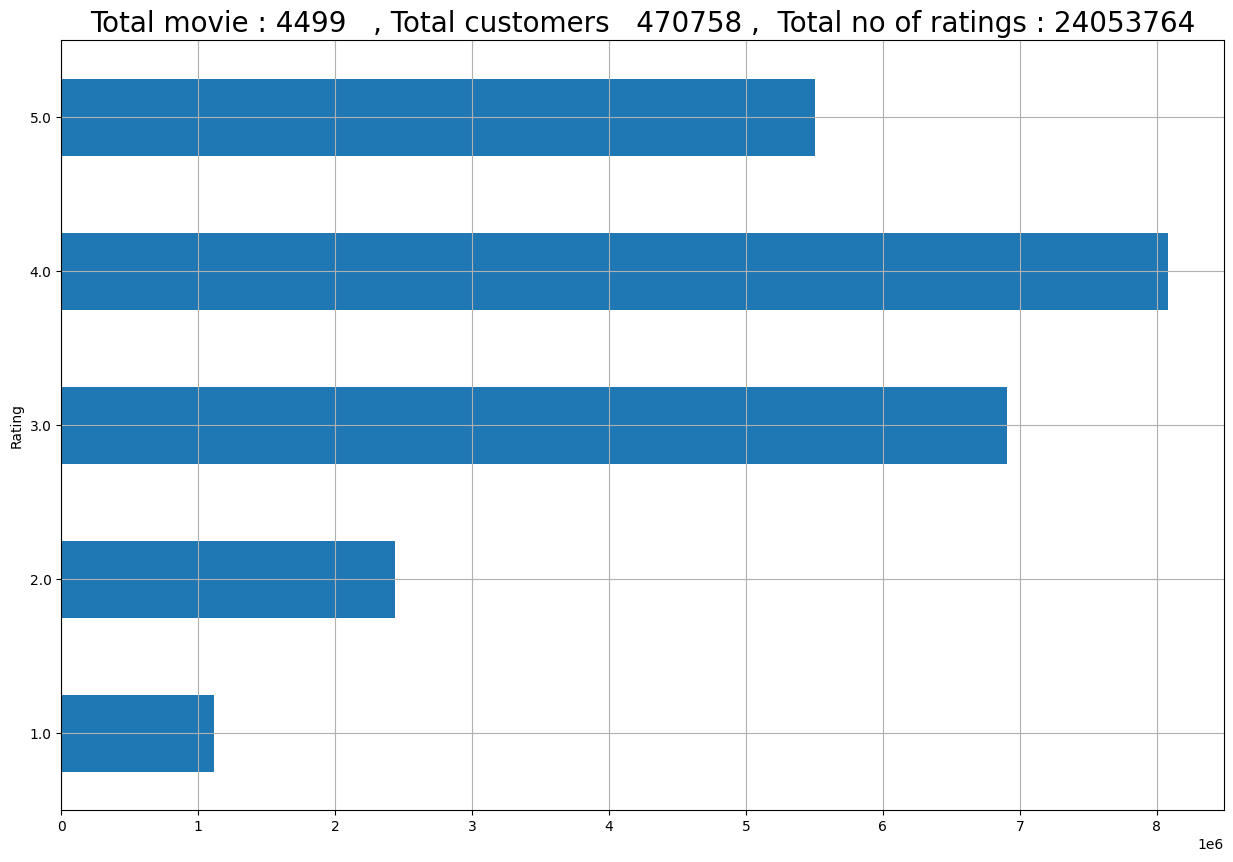

In [69]:
ax= stars.plot(kind="barh",legend=False , figsize=(15,10))
plt.title(f'Total movie : {movie_count}   , Total customers   {customer_count} ,  Total no of ratings : {rating_counts}', fontsize=20)
plt.grid(True)
plt.show()

In [70]:
netflix_dataset

Cust_Id  Rating
0              1:     NaN
1         1488844     3.0
2          822109     5.0
3          885013     4.0
4           30878     4.0
...           ...     ...
24058258  2591364     2.0
24058259  1791000     2.0
24058260   512536     5.0
24058261   988963     3.0
24058262  1704416     3.0

[24058263 rows x 2 columns]

In [71]:
# Lets just make a clear dataframe to find how many movie id are there

movie_id=None
movie_np = [ ]  # Empty list to store all movie id

# Iterate over the dataframe rows
for i in netflix_dataset["Cust_Id"]:
  if ":" in i:
    # Update the current movie ID in column
    movie_id = int(i.replace(":" , ''))         # removing : from number
  movie_np.append(movie_id) # Adding movie id number in the list

In [72]:
def abc():
  None
  #Placeholder Function:

  # Sometimes, developers define empty functions as placeholders to be implemented later.
# Instead of None, a more common approach is using pass:

In [73]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [74]:
#Add the new column to the Dataframe
netflix_dataset['movie_Id']  = movie_np

In [75]:

netflix_dataset

Cust_Id  Rating  movie_Id
0              1:     NaN         1
1         1488844     3.0         1
2          822109     5.0         1
3          885013     4.0         1
4           30878     4.0         1
...           ...     ...       ...
24058258  2591364     2.0      4499
24058259  1791000     2.0      4499
24058260   512536     5.0      4499
24058261   988963     3.0      4499
24058262  1704416     3.0      4499

[24058263 rows x 3 columns]

In [76]:
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]
# it exclude rows where the 'Rating' is Nan) to keep only the rows where the 'Ratings' columns is not null (i.e. i)

In [77]:
netflix_dataset

Cust_Id  Rating  movie_Id
1         1488844     3.0         1
2          822109     5.0         1
3          885013     4.0         1
4           30878     4.0         1
5          823519     3.0         1
...           ...     ...       ...
24058258  2591364     2.0      4499
24058259  1791000     2.0      4499
24058260   512536     5.0      4499
24058261   988963     3.0      4499
24058262  1704416     3.0      4499

[24053764 rows x 3 columns]

In [78]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [79]:
# Change the datatype of cust id from object to int

netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)

<ipython-input-79-c44a7fc3da9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)


In [80]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [81]:
#pre-filtering
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers

In [82]:
#also all those movie that has been rated less in numbers
dataset_movie_summary = netflix_dataset.groupby('movie_Id')['Rating'].agg(["count"])

In [83]:
dataset_movie_summary    # ex: movie_id 1 got 547 rating

count
movie_Id       
1           547
2           145
3          2012
4           142
5          1140
...         ...
4495        614
4496       9519
4497        714
4498        269
4499        428

[4499 rows x 1 columns]

In [84]:
#now we will create a benchmark :- in this we sort the movie which are got rating from 60% obove
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.6),0)    # Round off to how many decimal places 0 means 48 not 48.0
movie_benchmark  #This means that movies with fewer than 908 ratings may be filtered out.

908.0

In [85]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count']< movie_benchmark].index
drop_movie_list  # so we remove that 908 movie which rating less

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='movie_Id', length=2699)

In [86]:
len(drop_movie_list)  #How many movie we are going to remove

2699

In [87]:
4499- 2699  # movie left

1800

In [88]:
#now we will remove all the users that are in-active     ( who have rated less number of movies?)
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

count
Cust_Id       
6          153
7          195
8           21
10          49
25           4
...        ...
2649404     12
2649409     10
2649421      3
2649426     74
2649429     62

[470758 rows x 1 columns]

In [89]:
# ex customer 60% gave the rating 153
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.6))
cust_benchmark

36

In [90]:
# If any user have rated less than 36 movie please remove them

drop_cust_list = dataset_cust_summary[dataset_cust_summary['count']< cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [91]:
len(drop_cust_list) # How many users we are going to remove

282042

In [92]:
netflix_dataset= netflix_dataset[~netflix_dataset["movie_Id"].isin(drop_movie_list)]  # Please consider everything movie after excluding the movie which are present in this list
netflix_dataset= netflix_dataset[~netflix_dataset["Cust_Id"].isin(drop_cust_list)] # Please consider everything custer id after excluding the custer id which are present in this list


In [93]:
netflix_dataset  # Final shape after removing extra users and extra less rated movies

Cust_Id  Rating  movie_Id
696        712664     5.0         3
697       1331154     4.0         3
698       2632461     3.0         3
699         44937     5.0         3
700        656399     4.0         3
...           ...     ...       ...
24056842  1055714     5.0      4496
24056843  2643029     4.0      4496
24056844   267802     4.0      4496
24056845  1559566     3.0      4496
24056846   293198     3.0      4496

[19695836 rows x 3 columns]

In [94]:
# Final data that we are left behind is 1 crore 96 lakh 95 thousand 8 hundred thirty six

In [95]:
netflix_dataset.shape

(19695836, 3)

Singular Value Decomposition, or SVD for short, is a powerful mathematical tool used in data analysis and machine learning. At its core, SVD is a method for decomposing a matrix into its constituent parts, which can be thought of as a way to extract meaningful information from complex data. This makes it an incredibly useful tool for a wide range of applications, from image compression to natural language processing.

So why is this useful?

• Well, SVD can be used for a variety of tasks, such as data compression, noise reduction, and feature extraction. It is particularly useful in machine learning and data analysis, where it can be used to identify patterns and relationships in large datasets. By breaking down a matrix into its constituent parts, we can gain a deeper understanding of the data and make more informed decisions based on our findings.

Applications of SVD in Python

• SVD has proven to be a powerful tool in various applications, including image compression, recommendation systems, and natural language processing. In image compression, SVD is used to reduce the size of an image without losing significant amounts of information. This is achieved by decomposing the image into its singular values and retaining only the most important ones. The result is a compressed image that takes up less space while still maintaining its quality.

• In recommendation systems, SVD is used to analyze user behavior and predict their preferences. By decomposing the user-item matrix, SVD can identify hidden patterns and relationships between users and items, allowing for more accurate recommendations. Similarly, in natural language processing, SVD can be used to analyze large datasets of text and identify semantic relationships between words and phrases. This allows for more accurate language modeling and text prediction.

# Model Building

In [96]:
# Load the second dataset for movie names as with previous dataset we only have movie id


In [97]:
df_title = pd.read_csv('/content/movie_titles.csv', encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id', 'Year', 'Name' ])

In [98]:
df_title

Movie_Id    Year                                               Name
0             1  2003.0                                    Dinosaur Planet
1             2  2004.0                         Isle of Man TT 2004 Review
2             3  1997.0                                          Character
3             4  1994.0                       Paula Abdul's Get Up & Dance
4             5  2004.0                           The Rise and Fall of ECW
...         ...     ...                                                ...
17765     17766  2002.0  Where the Wild Things Are and Other Maurice Se...
17766     17767  2004.0                  Fidel Castro: American Experience
17767     17768  2000.0                                              Epoch
17768     17769  2003.0                                        The Company
17769     17770  2003.0                                       Alien Hunter

[17770 rows x 3 columns]

In [99]:
!pip install scikit-surprise

In [100]:
! pip uninstall numpy

In [101]:
! pip install numpy==1.23.5

In [103]:
from surprise import Reader , Dataset , SVD
from surprise.model_selection import cross_validate

In [104]:
reader = Reader()

In [105]:
# we only work with top 10k rows for quick runtime

data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'movie_Id', 'Rating']][:100000], reader)

In [106]:
model = SVD() #cfreating SVD model

In [108]:
cross_validate(model, data, measures=['RMSE'], cv = 3)

{'test_rmse': array([1.01663082, 1.01587897, 1.02200864]),
 'fit_time': (2.496835231781006, 1.394383192062378, 1.3033998012542725),
 'test_time': (0.29450225830078125, 0.37952351570129395, 0.1585979461669922)}

# Recommendation

In [109]:
netflix_dataset

Cust_Id  Rating  movie_Id
696        712664     5.0         3
697       1331154     4.0         3
698       2632461     3.0         3
699         44937     5.0         3
700        656399     4.0         3
...           ...     ...       ...
24056842  1055714     5.0      4496
24056843  2643029     4.0      4496
24056844   267802     4.0      4496
24056845  1559566     3.0      4496
24056846   293198     3.0      4496

[19695836 rows x 3 columns]

In [110]:
df_title

Movie_Id    Year                                               Name
0             1  2003.0                                    Dinosaur Planet
1             2  2004.0                         Isle of Man TT 2004 Review
2             3  1997.0                                          Character
3             4  1994.0                       Paula Abdul's Get Up & Dance
4             5  2004.0                           The Rise and Fall of ECW
...         ...     ...                                                ...
17765     17766  2002.0  Where the Wild Things Are and Other Maurice Se...
17766     17767  2004.0                  Fidel Castro: American Experience
17767     17768  2000.0                                              Epoch
17768     17769  2003.0                                        The Company
17769     17770  2003.0                                       Alien Hunter

[17770 rows x 3 columns]

In [111]:
# Filter the dataset for the specific user
user_ratings = netflix_dataset[netflix_dataset['Cust_Id'] == 1055714]

In [112]:
# Find the number of unique movie rated by the user
movie_rated_by_user = user_ratings['movie_Id'].nunique()

movie_rated_by_user

340

In [113]:
user_1055714 = df_title.copy()  #making a copy for individual customer for the recommendation
user_1055714

Movie_Id    Year                                               Name
0             1  2003.0                                    Dinosaur Planet
1             2  2004.0                         Isle of Man TT 2004 Review
2             3  1997.0                                          Character
3             4  1994.0                       Paula Abdul's Get Up & Dance
4             5  2004.0                           The Rise and Fall of ECW
...         ...     ...                                                ...
17765     17766  2002.0  Where the Wild Things Are and Other Maurice Se...
17766     17767  2004.0                  Fidel Castro: American Experience
17767     17768  2000.0                                              Epoch
17768     17769  2003.0                                        The Company
17769     17770  2003.0                                       Alien Hunter

[17770 rows x 3 columns]